# Is this Picasso? An AI goes to the museum.

---

### BASIC OPERATIONS
In this notebook I will make basic operations with images and define the functions needed to build a dataset for this
 project.

___
### AUTOUPDATE UTILS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %reload_ext autoreload

___
### IMPORTS

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.data_handling import get_collection, process_collection, show_collection
from utils.image_processing import color_clustering, get_img_rgb, reduce_col_palette, resize_img, square_img
from utils.misc import mklist

___
### MODULES SETTINGS

In [4]:
%matplotlib inline

sns.set_theme(style='whitegrid',
              rc={'figure.figsize': (20, 10),
                  'axes.grid': False})

___
### GETTING IMAGES

In [5]:
collection = get_collection(path='../data/raw_images/sample_img', extensions=['.jpg'])

7 images found in sample_img


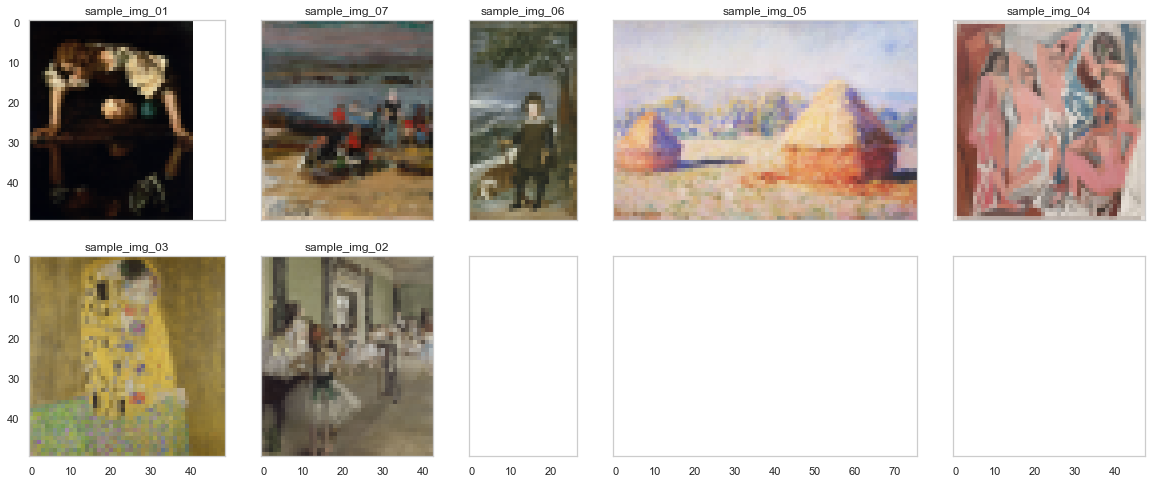

In [6]:
show_collection(collection)

___
### PROCESSING IMAGES

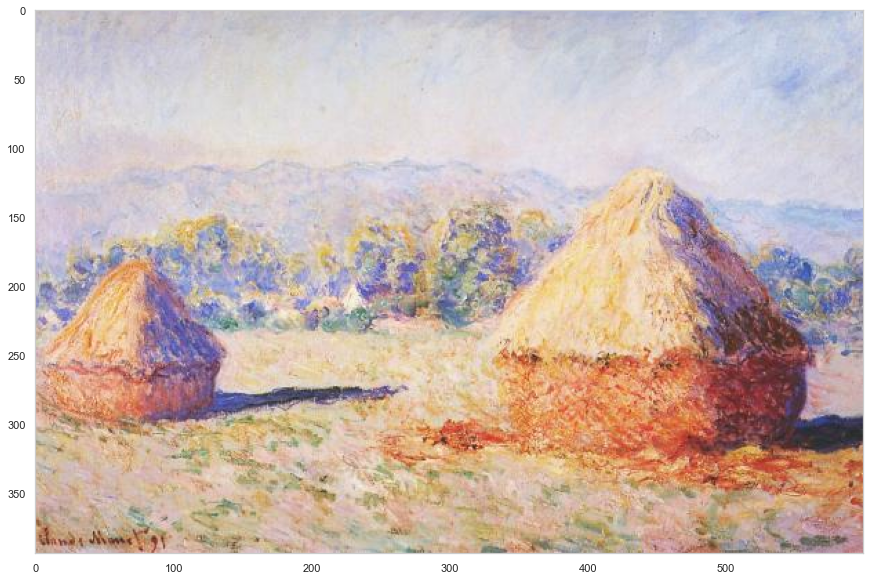

In [7]:
img = get_img_rgb('../data/raw_images/sample_img/sample_img_05.jpg')
plt.imshow(img);

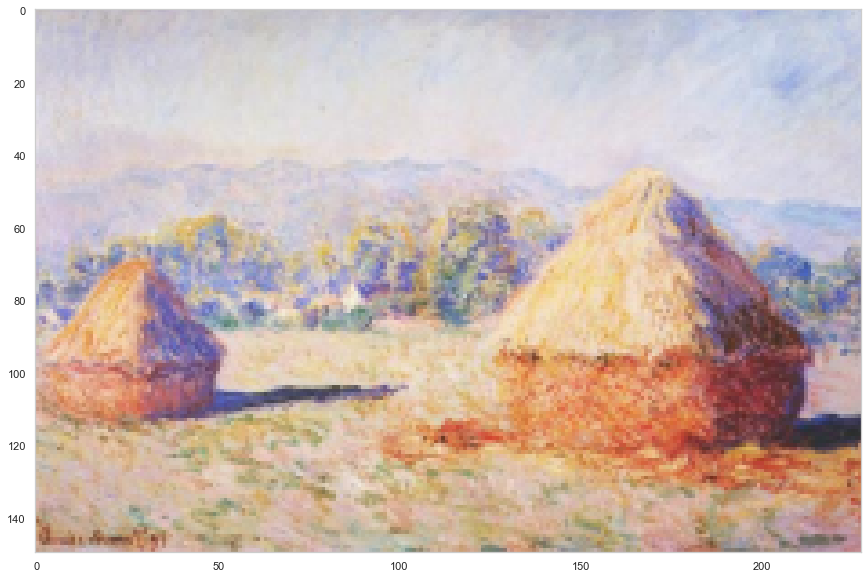

In [8]:
img = resize_img(img, 150)
plt.imshow(img);

Palette reduced to 125 colors.


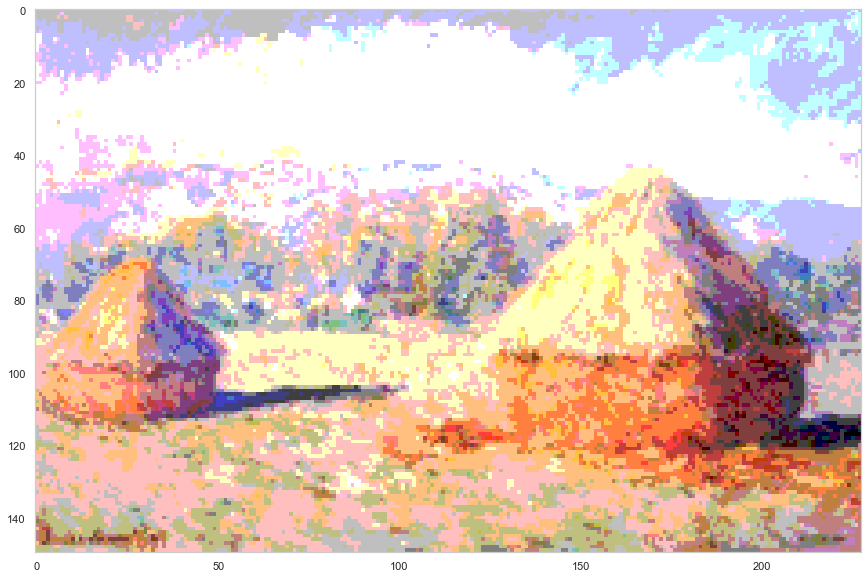

In [9]:
img = reduce_col_palette(img, bins=5, info=True)
plt.imshow(img);

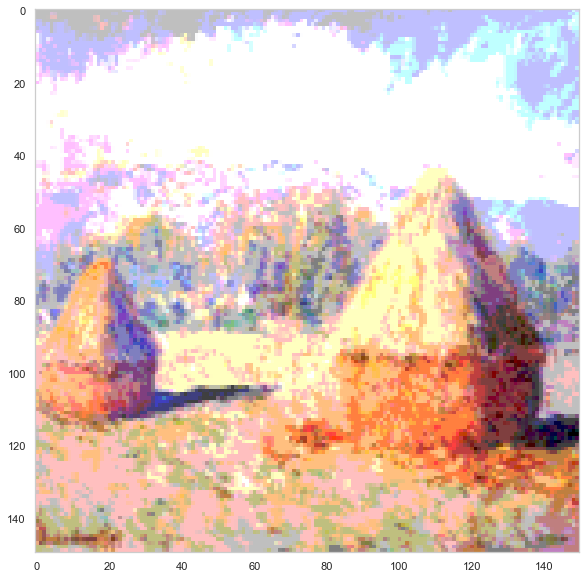

In [10]:
img = square_img(img, 150)
plt.imshow(img);

In [11]:
colors = color_clustering(img, color_mode='RGB', num_of_colors=5, show_chart=True)

___
### PROCESSING COLLECTION

In [16]:
collection

[PurePosixPath('../data/raw_images/sample_img/sample_img_01.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_07.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_06.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_05.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_04.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_03.jpg'),
 PurePosixPath('../data/raw_images/sample_img/sample_img_02.jpg')]

In [18]:
%%time

data, errors = process_collection(collection,
                                  color_mode='RGB',
                                  label='sample_images',
                                  save=True,
                                  save_path='../data/processed_img/')

1 exceptions raised during the process. Check errors_log for more info.

CPU times: user 9.93 s, sys: 1.27 s, total: 11.2 s
Wall time: 6.19 s


___
### BUILDING DATASET

First of all, I will create a *collection* for each artist that later on I will merge into a *museum*.

In [20]:
artists = ['caravaggio', 'degas', 'goya', 'hokusai', 'kahlo',
           'kandinsky', 'klimt', 'lichtenstein', 'mondrian', 'monet',
           'picasso', 'pollock', 'sorolla', 'velazquez', 'warhol']

In [21]:
valid_extensions = ['.jpg', '.jpeg']

caravaggio_collection = get_collection('../data/raw_images/caravaggio', valid_extensions)
degas_collection = get_collection('../data/raw_images/degas', valid_extensions)
goya_collection = get_collection('../data/raw_images/goya', valid_extensions)
hokusai_collection = get_collection('../data/raw_images/hokusai', valid_extensions)
kahlo_collection = get_collection('../data/raw_images/kahlo', valid_extensions)
kandinsky_collection = get_collection('../data/raw_images/kandinsky', valid_extensions)
klimt_collection = get_collection('../data/raw_images/klimt', valid_extensions)
lichtenstein_collection = get_collection('../data/raw_images/lichtenstein', valid_extensions)
mondrian_collection = get_collection('../data/raw_images/mondrian', valid_extensions)
monet_collection = get_collection('../data/raw_images/monet', valid_extensions)
picasso_collection = get_collection('../data/raw_images/picasso', valid_extensions)
pollock_collection = get_collection('../data/raw_images/pollock', valid_extensions)
sorolla_collection = get_collection('../data/raw_images/sorolla', valid_extensions)
velazquez_collection = get_collection('../data/raw_images/velazquez', valid_extensions)
warhol_collection = get_collection('../data/raw_images/warhol', valid_extensions)

collections = [caravaggio_collection, degas_collection, goya_collection, hokusai_collection, kahlo_collection,
               kandinsky_collection, klimt_collection, lichtenstein_collection, mondrian_collection, monet_collection,
               picasso_collection, pollock_collection, sorolla_collection, velazquez_collection, warhol_collection]

88 images found in caravaggio
626 images found in degas
390 images found in goya
267 images found in hokusai
100 images found in kahlo
227 images found in kandinsky
161 images found in klimt
152 images found in lichtenstein
100 images found in mondrian
1366 images found in monet
1169 images found in picasso
90 images found in pollock
367 images found in sorolla
134 images found in velazquez
231 images found in warhol


In [23]:
caravaggio_dset, degas_dset, goya_dset, hokusai_dset, kahlo_dset = mklist(5)
kandinsky_dset, klimt_dset, lichtenstein_dset, mondrian_dset, monet_dset = mklist(5)
picasso_dset, pollock_dset, sorolla_dset, velazquez_dset, warhol_dset = mklist(5)

collections_data = [caravaggio_dset, degas_dset, goya_dset, hokusai_dset, kahlo_dset,
                    kandinsky_dset, klimt_dset, lichtenstein_dset, mondrian_dset, monet_dset,
                    picasso_dset, pollock_dset, sorolla_dset, velazquez_dset, warhol_dset]

In [25]:
caravaggio_errors, degas_errors, goya_errors, hokusai_errors, kahlo_errors = mklist(5)
kandinsky_errors, klimt_errors, lichtenstein_errors, mondrian_errors, monet_errors = mklist(5)
picasso_errors, pollock_errors, sorolla_errors, velazquez_errors, warhol_errors = mklist(5)

collections_errors = [caravaggio_errors, degas_errors, goya_errors, hokusai_errors, kahlo_errors,
                      kandinsky_errors, klimt_errors, lichtenstein_errors, mondrian_errors, monet_errors,
                      picasso_errors, pollock_errors, sorolla_errors, velazquez_errors, warhol_errors]

In [26]:
%%time

for artist, collection, collection_data, collection_error in zip(artists,
                                                                 collections,
                                                                 collections_data,
                                                                 collections_errors):
    collection_data, collection_error = process_collection(collection,
                                                           color_mode='RGB',
                                                           label=f'{artist}',
                                                           save=True,
                                                           save_path='../data/processed_img/')

0 exceptions raised during the process. Check errors_log for more info.



Corrupt JPEG data: 10 extraneous bytes before marker 0xd9


32 exceptions raised during the process. Check errors_log for more info.

11 exceptions raised during the process. Check errors_log for more info.



/opt/anaconda3/envs/mabatalla_2022/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


29 exceptions raised during the process. Check errors_log for more info.

6 exceptions raised during the process. Check errors_log for more info.

15 exceptions raised during the process. Check errors_log for more info.



/opt/anaconda3/envs/mabatalla_2022/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


39 exceptions raised during the process. Check errors_log for more info.

6 exceptions raised during the process. Check errors_log for more info.



/opt/anaconda3/envs/mabatalla_2022/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


11 exceptions raised during the process. Check errors_log for more info.

225 exceptions raised during the process. Check errors_log for more info.



Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


88 exceptions raised during the process. Check errors_log for more info.

5 exceptions raised during the process. Check errors_log for more info.

4 exceptions raised during the process. Check errors_log for more info.

0 exceptions raised during the process. Check errors_log for more info.

52 exceptions raised during the process. Check errors_log for more info.

CPU times: user 2h 41min 1s, sys: 20min 28s, total: 3h 1min 29s
Wall time: 1h 15min 43s


___
### AUXILIAR DATA

In [16]:
import pandas as pd

import plotly.graph_objs as go
from plotly.offline import iplot

In [18]:
sample_img = get_img_rgb('../data/raw_images/sample_img/sample_img_05.jpg')
sample_img = resize_img(img, 150)

sample_img_flat = img.flatten()
sample_img_full_colors_clus = pd.DataFrame(data={'R': sample_img_flat[:-2:3],
                                                 'G': sample_img_flat[1:-1:3],
                                                 'B': sample_img_flat[2::3]})

sample_img_reduced = reduce_col_palette(sample_img, bins=5, info=False)
sample_img_reduced_flat = sample_img_reduced.flatten()
sample_img_reduced_clus = pd.DataFrame(data={'R': sample_img_reduced_flat[:-2:3],
                                             'G': sample_img_reduced_flat[1:-1:3],
                                             'B': sample_img_reduced_flat[2::3]})

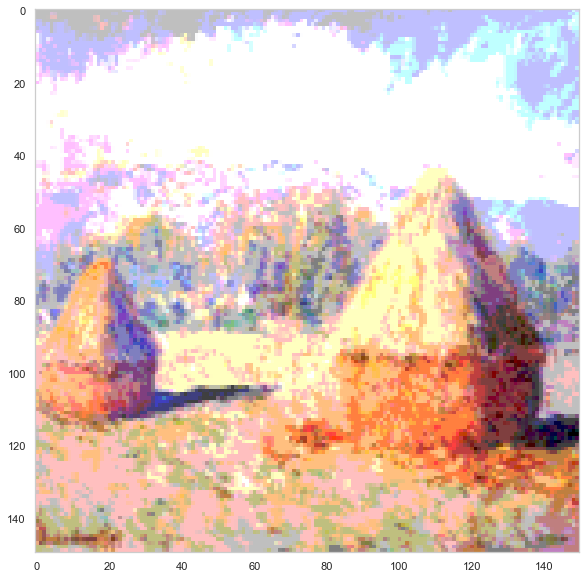

In [23]:
plt.imshow(sample_img);

In [19]:
scatter_3d_1 = go.Scatter3d(x=sample_img_full_colors_clus['R'],
                            y=sample_img_full_colors_clus['G'],
                            z=sample_img_full_colors_clus['B'],
                            mode='markers',
                            marker=dict(size=2.5, color='rgb(93,145,153)'))

datum = [scatter_3d_1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=datum, layout=layout)
fig.update_layout(autosize=False,
                  width=800,
                  height=800)
iplot(fig)

In [101]:
colors_ = [item for sublist in colors for item in sublist]

colors_

[255.0,
 255.0,
 255.0,
 0.0,
 0.0,
 0.0,
 191.0,
 127.0,
 63.0,
 191.0,
 191.0,
 255.0,
 191.0,
 191.0,
 191.0]

In [107]:
trace1 = go.Scatter3d(x=image_clus['R'],
                      y=image_clus['G'],
                      z=image_clus['B'],
                      mode='markers',
                      marker=dict(size=5, color='rgb(93,145,153)'))

datum = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=datum, layout=layout)
fig.update_layout(autosize=False,
                  width=800,
                  height=800)
iplot(fig)

In [108]:
colors_

clus_full = pd.DataFrame(data={'x': colors_[:-2:3], 'y': colors_[1:-1:3], 'z': colors_[2::3]})

trace1 = go.Scatter3d(x=clus_full['x'],
                      y=clus_full['y'],
                      z=clus_full['z'],
                      mode='markers',
                      marker=dict(size=5, color='rgb(212,84,85)'))

datum = [trace1]
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=datum, layout=layout)
fig.update_layout(autosize=False,
                  width=800,
                  height=800)
iplot(fig)